Mounted at /content/drive
   Id  LotFrontage  LotArea HouseStyle  OverallQual  OverallCond  YearBuilt  \
0   1         65.0   8450.0     2Story            7            5       2003   
1   2         80.0   9600.0     1Story            6            8       1976   
2   3         68.0  11250.0     2Story            7            5       2001   
3   4         60.0   9550.0     2Story            7            5       1915   
4   5         84.0  14260.0     2Story            8            5       2000   

   TotalBsmtSF CentralAir  1stFlrSF  2ndFlrSF  FullBath  TotalRooms  \
0        856.0          Y       856       854         2           8   
1          NaN          Y      1262         0         2           6   
2        920.0          Y       920       866         2           6   
3          NaN          Y       961       756         1           7   
4       1145.0          Y      1145      1053         2           9   

   GarageCars  GarageArea  YrSold  SalePrice  
0           2         548

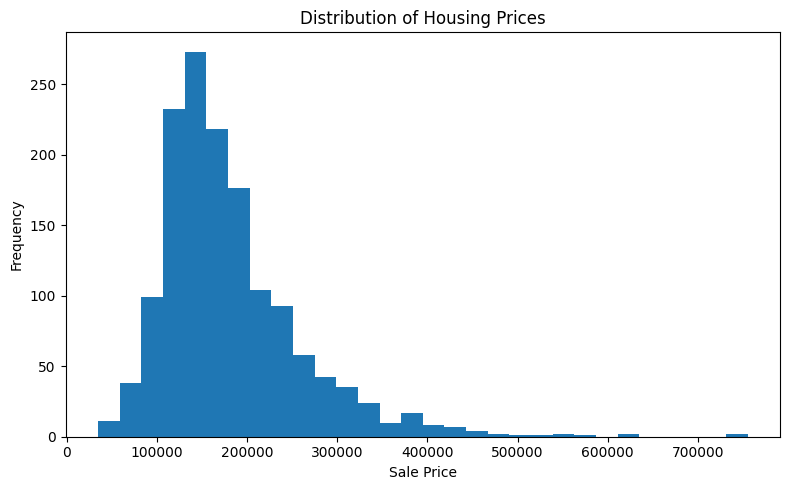


Outlier summary:
Q1: $129,975.00, Q3: $214,000.00, IQR: $84,025.00
Lower bound: $3,937.50, Upper bound: $340,037.50
Number of outliers: 61


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/MSSP6070/data/HousingPrices.csv'

df = pd.read_csv(file_path)

print(df.head())

# ===== 1. Mean & SD =====
mean_price = df['SalePrice'].mean()
std_price = df['SalePrice'].std()

print(f"\nMean Sale Price: ${mean_price:,.2f}")
print(f"Standard Deviation of Sale Price: ${std_price:,.2f}")

# ===== 2. Histogram =====
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# ===== 3. Outliers (IQR) =====
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['SalePrice'] < lower) | (df['SalePrice'] > upper)]

print("\nOutlier summary:")
print(f"Q1: ${Q1:,.2f}, Q3: ${Q3:,.2f}, IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower:,.2f}, Upper bound: ${upper:,.2f}")
print(f"Number of outliers: {len(outliers)}")

